In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from FRED_data_pull import *
from pathlib import Path
from datetime import datetime, timedelta
import os
import dotenv
dotenv.load_dotenv()
api_key = os.environ['FRED_API_KEY']
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#ppi = pull_data(['PPIFIS'],
#                 'm', api_key)
ppi = pull_data(['PPIACO'],
                 'm', api_key)
core_ppi = pull_data(['PPIFES'],
                 'm', api_key)
cpi = pull_data(['CPIAUCSL'],
                 'm', api_key)
core_cpi = pull_data(['CPILFESL'],
                 'm', api_key)
pce = pull_data(['PCEPI'],
                 'm', api_key)
core_pce = pull_data(['PCEPILFE'],
                 'm', api_key)
gasoline = pull_data(['GASREGW'],
                 'm', api_key)
crude = pull_data(['DCOILWTICO'],
                 'm', api_key)
dollar = pull_data(['DTWEXBGS'],
                 'm', api_key)
unemployment = pull_data(['UNRATE'],
                 'm', api_key)
#payrolls = pull_data(['PAYEMS'],
#                 'm', api_key)
import_prices = pull_data(['IR'],
                 'm', api_key)
core_import_prices = pull_data(['IR4'],
                 'm', api_key)
inflation_expectations = pull_data(['T5YIE'],
                 'm', api_key)
corn = pull_data(['PMAIZMTUSDM'],
                 'm', api_key)
wheat = pull_data(['PWHEAMTUSDM'],
                 'm', api_key)
soybeans = pull_data(['PSOYBUSDM'],
                 'm', api_key)

C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1

In [3]:
file_path = Path("ism_services_df.xlsx")
ism_services_df = pd.read_excel(file_path).set_index('date')
file_path = Path("ism_manufacturing_df.xlsx")
ism_manufacturing_df = pd.read_excel(file_path).set_index('date')
file_path = Path("dxy_df.xlsx")
dxy_df = pd.read_excel(file_path).set_index('date')
file_path = Path("philly_services_df.xlsx")
philly_services_df = pd.read_excel(file_path).set_index('date')
file_path = Path("philly_manufacturing_df.xlsx")
philly_manufacturing_df = pd.read_excel(file_path).set_index('date')
file_path = Path("empire_manufacturing_df.xlsx")
empire_manufacturing_df = pd.read_excel(file_path).set_index('date')
file_path = Path("nfib_prices_df.xlsx")
nfib_prices_df = pd.read_excel(file_path).set_index('date')
#file_path = Path("Adobe DPI.xlsx")
#adbe_df = pd.read_excel(file_path).set_index('date')

In [4]:
data_raw = pd.DataFrame()
#data_raw['DXY'] = dollar
data_raw['Gasoline'] = gasoline
data_raw['Crude'] = crude
data_raw['Unemployment'] = unemployment
#data_raw['Payrolls'] = payrolls
data_raw['CPI'] = cpi
data_raw['Core CPI'] = core_cpi
data_raw['PCE'] = pce
data_raw['Core PCE'] = core_pce
#data_raw['Import Prices'] = import_prices
#data_raw['Core Import Prices'] = core_import_prices
#data_raw['PPI'] = ppi
#data_raw['Core PPI'] = core_ppi
data_raw['Expectations'] = inflation_expectations
data_raw['Corn'] = corn
data_raw['Wheat'] = wheat
data_raw['Soybeans'] = soybeans

data_raw['DXY'] = dxy_df

data_raw = data_raw[::-1]

In [5]:
data = (np.log(data_raw).diff()*100)[1:]
data['Unemployment'] = (data_raw['Unemployment'].diff()*100)[1:]
#data['EXPINF2YR'] = (data_raw['EXPINF2YR'].diff()*1200)[1:]
data['Expectations'] = (data_raw['Expectations'].diff()*100)[1:]

#data.iloc[-2,3] = np.nan
#data.iloc[-2,4] = np.nan
#data.iloc[-2,5] = np.nan
#data.iloc[-2,6] = np.nan
#data.iloc[-2,7] = np.nan
#data.iloc[-2,8] = np.nan
#data.iloc[-2,9] = np.nan

C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [6]:
data['ISM Services'] = ism_services_df 
data['ISM Manufacturing'] = ism_manufacturing_df 
#data['Empire Manufacturing'] = empire_manufacturing_df 
#data['Philly Services'] = philly_services_df 
#data['Philly Manufacturing'] = philly_manufacturing_df 
data['NFIB Price Plans'] = nfib_prices_df
#data['Adobe DPI'] = adbe_df*1200
#data['Philly Empire Average'] = (philly_manufacturing_df['philly_index'] + empire_manufacturing_df['empire_index']) / 2

In [7]:
data = data[data.index >= '2003-02-28']
#data = data[data.index <= '2024-09-30']
#data = data[data.index >= '2014-01-31']

In [8]:
## Seasonal Adjustment

# Decompose
#decomposition = sm.tsa.seasonal_decompose(data['Gasoline'], model='additive')

# Extract the components
#trend = decomposition.trend
#seasonal = decomposition.seasonal
#residual = decomposition.resid

# Seasonally adjust
#data['Gasoline'] = data['Gasoline'] - seasonal


In [9]:
# Decompose
#decomposition = sm.tsa.seasonal_decompose(data['Import Prices'], model='additive')

# Extract the components
#trend = decomposition.trend
#seasonal = decomposition.seasonal
#residual = decomposition.resid

# Seasonally adjust
#data['Import Prices'] = data['Import Prices'] - seasonal

In [10]:
data

,Gasoline,Crude,Unemployment,CPI,Core CPI,PCE,Core PCE,Expectations,Corn,Wheat,Soybeans,DXY,ISM Services,ISM Manufacturing,NFIB Price Plans
date,,,,,,,,,,,,,,,
2003-02-28,10.103017,8.379427,10.0,0.546151,0.051962,0.420095,0.137942,25.0,0.280042,0.831663,0.449235,-0.159017,60.5,65.5,22.0
2003-03-31,4.840630,-6.694163,0.0,0.163265,0.000000,0.256359,0.160692,5.0,-0.955360,-9.168876,0.290086,-0.463540,59.4,70.0,15.0
2003-04-30,-6.339722,-17.358632,10.0,-0.381368,0.000000,-0.169974,0.110803,-13.0,0.195956,-2.505143,5.320059,-0.850408,55.7,63.5,15.0
2003-05-31,-5.964178,-0.213220,10.0,-0.163890,0.207577,-0.114767,0.143734,-23.0,2.408908,3.893237,4.714937,-3.589562,50.0,51.5,15.0
2003-06-30,-0.267559,8.683349,20.0,0.109290,0.051827,0.108323,0.055911,2.0,-0.819891,-10.358195,-1.141399,-0.560362,52.3,56.5,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,-2.764617,-6.463633,0.0,0.187045,0.280596,0.122927,0.166091,-21.0,-4.882464,-4.301969,-12.762015,-0.681752,57.3,54.0,25.0
2024-09-30,-5.301863,-8.772297,-10.0,0.179705,0.311927,0.171198,0.250244,0.0,8.141046,7.142700,2.797789,-0.612712,59.4,48.3,25.0
2024-10-31,-2.424934,2.460927,0.0,0.243755,0.279874,0.228883,0.261760,26.0,3.178930,4.596432,-0.973342,1.383496,58.1,54.8,26.0


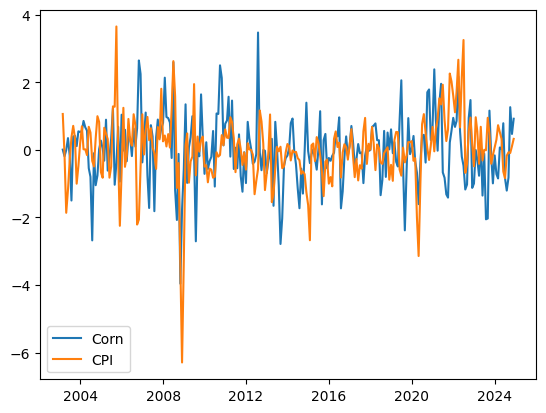

In [11]:
data_norm = (data - data.mean()) / data.std()
var_name_1 = 'Corn'
var_name_2 = 'CPI'
plt.plot(data_norm.index, data_norm[var_name_1], label=var_name_1)
plt.plot(data_norm.index, data_norm[var_name_2], label=var_name_2)
plt.legend()
plt.show()

In [12]:
data

,Gasoline,Crude,Unemployment,CPI,Core CPI,PCE,Core PCE,Expectations,Corn,Wheat,Soybeans,DXY,ISM Services,ISM Manufacturing,NFIB Price Plans
date,,,,,,,,,,,,,,,
2003-02-28,10.103017,8.379427,10.0,0.546151,0.051962,0.420095,0.137942,25.0,0.280042,0.831663,0.449235,-0.159017,60.5,65.5,22.0
2003-03-31,4.840630,-6.694163,0.0,0.163265,0.000000,0.256359,0.160692,5.0,-0.955360,-9.168876,0.290086,-0.463540,59.4,70.0,15.0
2003-04-30,-6.339722,-17.358632,10.0,-0.381368,0.000000,-0.169974,0.110803,-13.0,0.195956,-2.505143,5.320059,-0.850408,55.7,63.5,15.0
2003-05-31,-5.964178,-0.213220,10.0,-0.163890,0.207577,-0.114767,0.143734,-23.0,2.408908,3.893237,4.714937,-3.589562,50.0,51.5,15.0
2003-06-30,-0.267559,8.683349,20.0,0.109290,0.051827,0.108323,0.055911,2.0,-0.819891,-10.358195,-1.141399,-0.560362,52.3,56.5,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,-2.764617,-6.463633,0.0,0.187045,0.280596,0.122927,0.166091,-21.0,-4.882464,-4.301969,-12.762015,-0.681752,57.3,54.0,25.0
2024-09-30,-5.301863,-8.772297,-10.0,0.179705,0.311927,0.171198,0.250244,0.0,8.141046,7.142700,2.797789,-0.612712,59.4,48.3,25.0
2024-10-31,-2.424934,2.460927,0.0,0.243755,0.279874,0.228883,0.261760,26.0,3.178930,4.596432,-0.973342,1.383496,58.1,54.8,26.0


## PCA (To Get K_Factor)

In [13]:
# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.dropna())

n_components = 5  # Choose the number of components (dimensions) you want to reduce to
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [14]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)


Explained Variance Ratio: [0.37201071 0.16623017 0.11093245 0.08098463 0.06142419]


# Fit Model

In [15]:
factors = {'Gasoline': ['Global', 'Commodities and Inflation Expectations'],
           'Crude' : ['Global', 'Commodities and Inflation Expectations'],
           #'Import Prices' : ['Global', 'Commodities and Inflation Expectations'],
           #'PPI' : ['Global', 'Commodities and Inflation Expectations'],
           'Corn' : ['Global', 'Agricultural Commodities'],
           'Wheat' : ['Global', 'Agricultural Commodities'],
           'Soybeans' : ['Global', 'Agricultural Commodities'],
           #'Import Prices' : ['Global', 'Imports and FX'],
           #'Core Import Prices' : ['Global', 'Core Inflation'],
           'Unemployment' : ['Global'],
           #'Payrolls' : ['Global', 'Labor Market'],
           'CPI' : ['Global', 'Total Inflation'],
           'Core CPI' : ['Global', 'Core Inflation'],
           'PCE' : ['Global', 'Total Inflation'],
           'Core PCE' : ['Global', 'Core Inflation'],
           'Expectations' : ['Global', 'Commodities and Inflation Expectations'],
           'ISM Services' : ['Global', 'Soft Data'],
           'ISM Manufacturing' : ['Global', 'Soft Data'],
           #'Philly Empire Average' : ['Global', 'Soft Data'],
           #'Philly Manufacturing' : ['Global', 'Soft Data'],
           #'Empire Manufacturing' : ['Global', 'Soft Data'],
           'NFIB Price Plans' : ['Global', 'Soft Data'],
           'DXY' : ['Global','Commodities and Inflation Expectations']}
factor_orders = {'Global': 3}
factor_multiplicities = {'Global': 3}

In [16]:
cutoff = 2
#const_pre = np.ones(len(data)-cutoff)
model = sm.tsa.DynamicFactorMQ(data[:-cutoff], factors=factors, factor_orders=3, factor_multiplicities=factor_multiplicities, freq = 'M')#, enforce_stationarity=False)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Model Specification: Dynamic Factor Model                         
===========================================================================================
Model:                Dynamic Factor Model   # of observed variables:                    15
                   + 8 factors in 6 blocks   # of factor blocks:                          6
                     + AR(1) idiosyncratic   Idiosyncratic disturbances:              AR(1)
Sample:                2003-02-28 00:00:00   Standardize variables:                    True
                     - 2024-10-31 00:00:00                                                 
                                                            Observed variables / factor loadings                                                            
============================================================================================================================================================
    Dep. variable   Global.1   Global.2   Global.3 Commodities and Inflation Expectations Agricultural Commodities  Soft Data Core Inflation Total Inflation
------------------------------------------------------------------------------------------------------------------------------------------------------------
         Gasoline      X          X          X                       X                                                                                      
            Crude      X          X          X                       X                                                                                      
     Unemployment      X          X          X                                                                                                              
              CPI      X          X          X                                                                                                      X       
         Core CPI      X          X          X                                                                                      X                       
              PCE      X          X          X                                                                                                      X       
         Core PCE      X          X          X                                                                                      X                       
     Expectations      X          X          X                       X                                                                                      
             Corn      X          X          X                                                       X                                                      
            Wheat      X          X          X                                                       X                                                      
         Soybeans      X          X          X                                                       X                                                      
              DXY      X          X          X                       X                                                                                      
     ISM Services      X          X          X                                                                          X                                   
ISM Manufacturing      X          X          X                                                                          X                                   
 NFIB Price Plans      X          X          X                                                                          X                                   
                  Factor blocks:                 
=================================================
                                 block      order
-------------------------------------------------
          Global.1, Global.2, Global.3          3
Commodities and Inflation Expectations          3
              Agricultura

In [17]:
results = model.fit(maxiter=1000000, disp=100)

print(results.summary())

EM start iterations, llf=-3708.6
EM iteration 100, llf=-3395.4, convergence criterion=1.0361e-05
EM iteration 200, llf=-3393.6, convergence criterion=2.7651e-06
EM iteration 300, llf=-3392.9, convergence criterion=1.322e-06
EM converged at iteration 352, llf=-3392.7, convergence criterion=9.9812e-07 < tolerance=1e-06
                               Dynamic Factor Results                              
Dep. Variable:     "Gasoline", and 14 more   No. Observations:                  261
Model:                Dynamic Factor Model   Log Likelihood               -3392.735
                   + 8 factors in 6 blocks   AIC                           7069.469
                     + AR(1) idiosyncratic   BIC                           7575.631
Date:                     Fri, 10 Jan 2025   HQIC                          7272.930
Time:                             16:14:22   EM Iterations                      352
Sample:                         02-28-2003                                         
         

In [18]:
results.save('inflation_model.pkl')

In [19]:
if cutoff > 1:
    results_appended = results.append(endog = data[-cutoff:-1])
else:
    results_appended = results

# Specify the number of steps ahead you want to forecast
steps_ahead = 3  # For example, forecasting 12 months ahead
const_forecast = np.ones(steps_ahead)
# Generate forecasts
forecasts = results_appended.forecast(steps=steps_ahead, exog=const_forecast)

# The 'forecasts' variable now contains the forecasted values for each variable for the next 12 months
print(forecasts)


            Gasoline     Crude  Unemployment       CPI  Core CPI       PCE  \
2024-12-31 -0.609595 -0.075470      1.225982  0.208045  0.228965  0.169410   
2025-01-31  0.492467  0.922024     -0.289393  0.215236  0.197225  0.178484   
2025-02-28  1.100989  1.514322     -2.335689  0.233719  0.189557  0.196642   

            Core PCE  Expectations      Corn     Wheat  Soybeans       DXY  \
2024-12-31  0.184186     -4.459202  0.615488 -0.879983 -0.264726  0.893623   
2025-01-31  0.164848     -0.980761  0.232520 -0.053471  0.117228  0.340769   
2025-02-28  0.168499      1.548190  0.484759  0.303701  0.462248  0.060770   

            ISM Services  ISM Manufacturing  NFIB Price Plans  
2024-12-31     57.701532          50.333008         26.717339  
2025-01-31     57.896241          51.447171         25.786352  
2025-02-28     58.372295          52.680760         25.406094  


In [20]:
results_appended.get_prediction(start='2024-02-29', end='2024-04-30').summary_frame(5)

PCE,mean,mean_se,mean_ci_lower,mean_ci_upper
2024-02-29,0.285029,0.16335,-0.035130,0.605188
2024-03-31,0.253681,0.16335,-0.066478,0.573840
2024-04-30,0.288300,0.16335,-0.031859,0.608460


## Update Existing Forecasts

In [21]:
#start_date = str(data.index[-1])[:7]
#end_date = str(data.index[-1] + timedelta(32))[:7]
def get_news(data, results, lookback=1):
    start_date = data.index[-lookback]
    #print(start_date)
    end_date = start_date + relativedelta(months=lookback+1)
    end_date = datetime(end_date.year, end_date.month, 1) - timedelta(days=1)
    #print(results.summary())

    #const_post_plus1 = np.ones(len(data) + 1)
    news = results.news(data, start=start_date, end=end_date, freq ='M')
    return news

news = get_news(data, results_appended)

print(news.summary())

                                       News                                       
Model:                DynamicFactorMQ   Original sample:       2003-02-28 00:00:00
Date:                Fri, 10 Jan 2025                        - 2024-11-30 00:00:00
Time:                        16:14:22   Update through:        2024-12-31 00:00:00
                                        # of revisions:                          0
                                        # of new datapoints:                     7
                                      Impacts                                      
        impact date impacted variable estimate (prev) impact of news estimate (new)
-----------------------------------------------------------------------------------
2024-12-31 00:00:00               CPI            0.21           0.04           0.24
                NaT          Core CPI            0.23           0.01           0.24
                NaT          Core PCE            0.18           0.02           0.2

In [22]:
def update_forecast_data(forecast_df, news):#,length=2):
    #if length < 2:
    #    length = 2
    
    new_df = forecast_df.copy()
    #num_cols = len(new_df.columns)
    for i in range(len(news.impacts)):
        revision_date = news.impacts.index[i][0]
        col_name = news.impacts.index[i][1]
        new_df.loc[revision_date, col_name] = news.impacts.iloc[i,4]
    return new_df

def combine_data(history_df, forecast_df):
    #print(data)
    num_cols = len(history_df.columns)
    if num_cols == len(forecast_df.columns):
        new_df = pd.concat([history_df, forecast_df[1:]])
        for i in range(num_cols):
            if np.isnan(history_df.iloc[-1,i]):
                new_df.iloc[-len(forecast_df),i] = forecast_df.iloc[0,i]
        return new_df
    else:
        raise ValueError()

new_forecasts = update_forecast_data(forecasts, news)
new_data = combine_data(data, new_forecasts)
new_data.tail(5)

,Gasoline,Crude,Unemployment,CPI,Core CPI,PCE,Core PCE,Expectations,Corn,Wheat,Soybeans,DXY,ISM Services,ISM Manufacturing,NFIB Price Plans
2024-10-31,-2.424934,2.460927,0.000000,0.243755,0.279874,0.228883,0.261760,26.00000,3.178930,4.596432,-0.973342,1.383496,58.100000,54.800000,26.000000
2024-11-30,-2.714222,-2.874652,10.000000,0.312394,0.307610,0.127914,0.114861,16.00000,5.998462,-6.077022,-0.810535,2.158462,58.200000,50.300000,28.000000
2024-12-31,-1.153035,0.242736,-10.000000,0.243117,0.243467,0.197443,0.199964,-3.00000,1.225201,-0.329849,0.244275,1.007373,64.400000,52.500000,26.796486
2025-01-31,0.093013,0.867838,-2.477075,0.231323,0.211932,0.192407,0.177781,-1.27792,0.308540,0.000889,0.081752,0.447620,62.340152,53.869805,25.995037
2025-02-28,1.100989,1.514322,-2.335689,0.233719,0.189557,0.196642,0.168499,1.54819,0.484759,0.303701,0.462248,0.060770,58.372295,52.680760,25.406094


In [23]:
data.tail()

,Gasoline,Crude,Unemployment,CPI,Core CPI,PCE,Core PCE,Expectations,Corn,Wheat,Soybeans,DXY,ISM Services,ISM Manufacturing,NFIB Price Plans
date,,,,,,,,,,,,,,,
2024-08-31,-2.764617,-6.463633,0.0,0.187045,0.280596,0.122927,0.166091,-21.0,-4.882464,-4.301969,-12.762015,-0.681752,57.3,54.0,25.0
2024-09-30,-5.301863,-8.772297,-10.0,0.179705,0.311927,0.171198,0.250244,0.0,8.141046,7.142700,2.797789,-0.612712,59.4,48.3,25.0
2024-10-31,-2.424934,2.460927,0.0,0.243755,0.279874,0.228883,0.261760,26.0,3.178930,4.596432,-0.973342,1.383496,58.1,54.8,26.0
2024-11-30,-2.714222,-2.874652,10.0,0.312394,0.307610,0.127914,0.114861,16.0,5.998462,-6.077022,-0.810535,2.158462,58.2,50.3,28.0
2024-12-31,-1.153035,0.242736,-10.0,NaN,NaN,NaN,NaN,-3.0,NaN,NaN,NaN,1.007373,64.4,52.5,NaN


In [24]:
new_forecasts[0:]

,Gasoline,Crude,Unemployment,CPI,Core CPI,PCE,Core PCE,Expectations,Corn,Wheat,Soybeans,DXY,ISM Services,ISM Manufacturing,NFIB Price Plans
2024-12-31,-1.153035,0.242736,-10.000000,0.243117,0.243467,0.197443,0.199964,-3.00000,1.225201,-0.329849,0.244275,1.007373,64.400000,52.500000,26.796486
2025-01-31,0.093013,0.867838,-2.477075,0.231323,0.211932,0.192407,0.177781,-1.27792,0.308540,0.000889,0.081752,0.447620,62.340152,53.869805,25.995037
2025-02-28,1.100989,1.514322,-2.335689,0.233719,0.189557,0.196642,0.168499,1.54819,0.484759,0.303701,0.462248,0.060770,58.372295,52.680760,25.406094


In [25]:
new_data.tail(5)

,Gasoline,Crude,Unemployment,CPI,Core CPI,PCE,Core PCE,Expectations,Corn,Wheat,Soybeans,DXY,ISM Services,ISM Manufacturing,NFIB Price Plans
2024-10-31,-2.424934,2.460927,0.000000,0.243755,0.279874,0.228883,0.261760,26.00000,3.178930,4.596432,-0.973342,1.383496,58.100000,54.800000,26.000000
2024-11-30,-2.714222,-2.874652,10.000000,0.312394,0.307610,0.127914,0.114861,16.00000,5.998462,-6.077022,-0.810535,2.158462,58.200000,50.300000,28.000000
2024-12-31,-1.153035,0.242736,-10.000000,0.243117,0.243467,0.197443,0.199964,-3.00000,1.225201,-0.329849,0.244275,1.007373,64.400000,52.500000,26.796486
2025-01-31,0.093013,0.867838,-2.477075,0.231323,0.211932,0.192407,0.177781,-1.27792,0.308540,0.000889,0.081752,0.447620,62.340152,53.869805,25.995037
2025-02-28,1.100989,1.514322,-2.335689,0.233719,0.189557,0.196642,0.168499,1.54819,0.484759,0.303701,0.462248,0.060770,58.372295,52.680760,25.406094


## Recursive Estimation

In [28]:
def recursive_estimation(data, factors = 1, factor_orders = 3, factor_multiplicities = 1, steps_ahead = 2, start_point = 50, missing_var_names = None):
    if missing_var_names is None:
        missing_var_names = list(data.columns[data.iloc[-1].isna()])

    errors_df = pd.DataFrame(0, index=range(steps_ahead), columns=data.columns)
    preds_dfs = [pd.DataFrame(columns=data.columns)]*steps_ahead
    for i in range(start_point, len(data)-steps_ahead+1):
        print(len(data) - i)
        model = sm.tsa.DynamicFactorMQ(data[:i], factors=factors, factor_orders=factor_orders, factor_multiplicities = factor_multiplicities, freq = 'M')#,enforce_stationarity=False)
        results = model.fit(maxiter=100000, disp=100)

        # Generate forecasts
        forecasts = results.forecast(steps=steps_ahead)

        if len(missing_var_names) > 0:
            new_data = data.copy()[:i+1]
            for j, col in enumerate(new_data.columns):
                if col in missing_var_names:
                    new_data.iloc[-1, j] = np.nan
                    #print(new_data.tail())

            news = get_news(new_data, results)
            #print(news.impacts)
            forecasts = update_forecast_data(forecasts, news)
            forecasts = forecasts[:steps_ahead]
            #print(forecasts)
            
        # Compare Observed Values with Forecast and Record Results
        observed = data.copy()[i:i+steps_ahead]
        has_nans = observed.isna().any().any()
        if not has_nans:
            error = (forecasts - observed).reset_index(drop = True)
            errors_df = errors_df + error**2
        #display(errors_df)
        
        for k in range(steps_ahead):
            preds_dfs[k] = pd.concat([preds_dfs[k], forecasts[k:k+1]])

    errors_df = (errors_df / (len(data) - start_point - steps_ahead + 1))**0.5
        
    return preds_dfs, errors_df

In [29]:
cutoff=150
start_point = len(data[:-1]) - cutoff
missing_vars = list(data.columns[data.iloc[-1].isna()])
#missing_vars.remove('PPI')
preds_dfs, errors_df = recursive_estimation(data[:-1],
                                 factors = factors,
                                 factor_orders = 3,
                                 factor_multiplicities = factor_multiplicities,
                                 steps_ahead = 1,
                                 start_point = start_point,
                                 missing_var_names = missing_vars)

150
EM start iterations, llf=-1570.2
EM iteration 100, llf=-1429.4, convergence criterion=3.6266e-05
EM iteration 200, llf=-1426.5, convergence criterion=1.0436e-05
EM iteration 300, llf=-1425.5, convergence criterion=5.1974e-06
EM iteration 400, llf=-1424.9, convergence criterion=3.2167e-06
EM iteration 500, llf=-1424.5, convergence criterion=2.1287e-06
EM iteration 600, llf=-1424.2, convergence criterion=1.4593e-06
EM iteration 700, llf=-1424.1, convergence criterion=1.0372e-06
EM converged at iteration 712, llf=-1424.1, convergence criterion=9.9809e-07 < tolerance=1e-06
149
EM start iterations, llf=-1580.6
EM iteration 100, llf=-1441.3, convergence criterion=2.5055e-05
EM iteration 200, llf=-1438.8, convergence criterion=1.292e-05
EM iteration 300, llf=-1437.6, convergence criterion=6.1594e-06
EM iteration 400, llf=-1436.9, convergence criterion=3.8564e-06
EM iteration 500, llf=-1436.4, convergence criterion=2.6174e-06
EM iteration 600, llf=-1436.1, convergence criterion=1.8175e-06


## Comparison

In [30]:
cutoff = 150
var_name = 'CPI'

#### Nowcasting Model

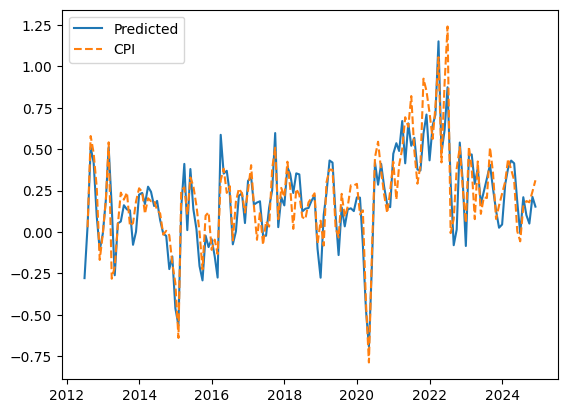

In [31]:
plt.plot(preds_dfs[0].index[-cutoff:], preds_dfs[0][var_name][-cutoff:], label='Predicted')
plt.plot(data.index[-cutoff:], data[var_name][-cutoff:], label=var_name, linestyle='--')
plt.legend()
plt.show()

In [ ]:
errors_df[missing_vars]

In [ ]:
def get_r_squared(var_name, pred_df, actual_df):
    r2 = np.round(np.corrcoef(pred_df[var_name], actual_df[var_name])[1][0]**2*100, 1)
    return r2

mse = errors_df[var_name][0]
r2 = get_r_squared(var_name, preds_dfs[0], data[start_point:-1])

print(f"Root Mean Squared Error: {mse}")
print(f"R-Squared : {r2}")

#### Naive Forecast

In [ ]:
mse = ((((data[-cutoff:-1] - data[-cutoff:-1].shift(1)).dropna()**2).mean())**0.5)[var_name]
r2 = get_r_squared(var_name, data[-cutoff:-1].shift(1).dropna(), data[-cutoff+1:-1])

print(f"Root Mean Squared Error: {mse}")
print(f"R-Squared : {r2}")

#### AR(1) Model

In [ ]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

def fit_ar1_initial_slice(data, initial_slice):
    """
    Fit AR(1) model to the initial slice of the data.
    
    Parameters:
    data (array-like): The dataset.
    initial_slice (int): The end index of the initial slice of data to fit the model on.
    
    Returns:
    tuple: Fitted values of c (intercept) and phi (coefficient).
    """
    # Prepare the lagged version of the series
    X = data[:initial_slice-1]
    Y = data[1:initial_slice]
    X = add_constant(X)  # Add intercept term
    
    # Fit the model
    model = OLS(Y, X).fit()
    
    return model.params[0], model.params[1]  # Intercept (c) and coefficient (phi)

def predict_ar1(c, phi, X_prev):
    """
    Predict the next value in an AR(1) process.
    
    Parameters:
    c (float): Intercept term from AR(1) model.
    phi (float): Coefficient from AR(1) model.
    X_prev (float): The previous observed value in the series.
    
    Returns:
    float: Predicted next value of the series.
    """
    return c + phi * X_prev

def evaluate_recursive_ar1(data, initial_slice):
    """
    Evaluate the predictive performance of a recursive AR(1) on a dataset.
    
    Parameters:
    data (array-like): The dataset to be used.
    initial_slice (int): The end index of the initial slice of data to fit the model on.
    
    Returns:
    float: Mean Squared Error of the predictions.
    """
    # Fit the AR(1) model on the initial slice
    c, phi = fit_ar1_initial_slice(data, initial_slice)
    
    # Initialize list to store predictions
    predictions = []
    
    # Predict and update step
    for t in range(initial_slice, len(data)):
        X_prev = data[t-1]
        pred = predict_ar1(c, phi, X_prev)
        predictions.append(pred)
    
    # Calculate Mean Squared Error
    mse = np.mean((data[initial_slice:] - predictions)**2)**0.5
    r2 = np.corrcoef(data[initial_slice:], predictions)**2
    return predictions, mse, r2

predictions, mse, r2 = evaluate_recursive_ar1(np.array(data[:-1][var_name]), cutoff)
print(f"Root Mean Squared Error: {mse}")
print(f"R-Squared : {np.round(r2[1][0]*100,1)}")

#### Cleveland Fed

In [ ]:
file_path = Path("cleveland_fed_nowcast.xlsx")
cleveland_df = pd.read_excel(file_path).set_index('date').dropna().drop_duplicates().reset_index()
cleveland_df = cleveland_df[cleveland_df['date'] < '2024-02-01']

cleveland_df = cleveland_df[cleveland_df['date'].dt.day < 10]

cleveland_df['prev_date'] = cleveland_df['date'].shift(-1)

# Keep only the rows where the month of the date is different from the month of the next date
# Or if it's the last row, as the shift would introduce a NaT (not a time) value
cleveland_df = cleveland_df[(cleveland_df['date'].dt.month != cleveland_df['prev_date'].dt.month) | (cleveland_df['prev_date'].isna())]

cleveland_df['date'] = cleveland_df['date'] + pd.offsets.MonthEnd()
cleveland_df = cleveland_df.drop(columns='prev_date').set_index('date')

cleveland_df = cleveland_df[cleveland_df[var_name] < 1]

In [ ]:
cleveland_cutoff = len(cleveland_df)
mse = ((((cleveland_df - data[['CPI', 'Core CPI', 'PCE', 'Core PCE']][data.index >= cleveland_df.index[0]])**2).mean())**0.5)[var_name]
r2 = get_r_squared(var_name, cleveland_df, data[data.index.isin(cleveland_df.index)])


print(f"Root Mean Squared Error: {mse}")
print(f"R-Squared : {r2}")

In [ ]:
plt.plot(cleveland_df.index, cleveland_df[var_name], label='Predicted')
plt.plot(data.index[-cleveland_cutoff:], data[var_name][-cleveland_cutoff:], label=var_name, linestyle='--')
plt.legend()
plt.show()

In [ ]:
## Post CPI Release
cleveland_df = pd.read_excel(file_path).set_index('date').dropna().drop_duplicates().reset_index()
cleveland_df = cleveland_df[cleveland_df['date'] < '2024-02-01']

cleveland_df = cleveland_df[cleveland_df['date'].dt.day > 20]

cleveland_df = cleveland_df[cleveland_df['date'].dt.dayofweek.isin([3, 4, 5])]

cleveland_df['prev_date'] = cleveland_df['date'].shift(-1)

# Keep only the rows where the month of the date is different from the month of the next date
# Or if it's the last row, as the shift would introduce a NaT (not a time) value
cleveland_df = cleveland_df[(cleveland_df['date'].dt.month != cleveland_df['prev_date'].dt.month) | (cleveland_df['prev_date'].isna())]

cleveland_df['date'] = cleveland_df['date'] -timedelta(days=1) + pd.offsets.MonthEnd()

cleveland_df = cleveland_df.drop(columns='prev_date').set_index('date')

In [ ]:
cleveland_df = cleveland_df[cleveland_df[var_name] < 1]

In [ ]:
cleveland_cutoff = len(cleveland_df)
mse = ((((cleveland_df - data[['CPI', 'Core CPI', 'PCE', 'Core PCE']][data.index >= cleveland_df.index[0]])**2).mean())**0.5)[var_name]
r2 = get_r_squared(var_name, cleveland_df, data[data.index.isin(cleveland_df.index)])

print(f"Root Mean Squared Error: {mse}")
print(f"R-Squared : {r2}")

In [ ]:
plt.plot(cleveland_df.index, cleveland_df[var_name], label='Predicted')
plt.plot(data.index[-cleveland_cutoff:], data[var_name][-cleveland_cutoff:], label=var_name, linestyle='--')
plt.legend()
plt.show()

In [ ]:
## VS Model Forecasts for Same Time Window

mse = ((((preds_dfs[0][['CPI', 'Core CPI', 'PCE', 'Core PCE']][-cleveland_cutoff:] - data[['CPI', 'Core CPI', 'PCE', 'Core PCE']][-cleveland_cutoff:-1]).dropna()**2).mean())**0.5)[var_name]
r2 = get_r_squared(var_name, preds_dfs[0], data[start_point:-1])

print(f"Root Mean Squared Error: {mse}")
print(f"R-Squared : {r2}")